In [1]:
from pathlib import Path

from itertools import product

import logging

import yappi

import seaborn as sns
from pandas import DataFrame

from muCh import muCh
from checking import Checker
from parsing import Parser

In [2]:
systems_dir = Path("../material/dining/")
formulas_dir = Path("../material/dining/")

logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s',
                    datefmt='%H:%M:%S',
                    level=logging.INFO)

In [3]:
algorithm = Checker.Algorithm.NAIVE

system_paths = [file for file in systems_dir.iterdir() if file.suffix == '.aut']
formula_paths = [file for file in formulas_dir.iterdir() if file.suffix == '.mcf']

In [4]:
formulas = {}
for formula_path in formula_paths:
    logging.info("Parsing formula '%s'." % formula_path.name)
    formulas[formula_path.name] = Parser.parse_formula(formula_path)

systems = {}
for system_path in system_paths:
    logging.info("Parsing system '%s'." % system_path.name)
    systems[system_path.name] = Parser.parse_system(system_path)

18:02:29:INFO:Parsing formula 'invariantly_inevitably_eat.mcf'.
18:02:29:INFO:Parsing formula 'invariantly_plato_starves.mcf'.
18:02:29:INFO:Parsing formula 'invariantly_possibly_eat.mcf'.
18:02:29:INFO:Parsing formula 'plato_infinitely_often_can_eat.mcf'.
18:02:29:INFO:Parsing system 'dining_10.aut'.
18:03:46:INFO:Parsing system 'dining_2.aut'.
18:03:46:INFO:Parsing system 'dining_3.aut'.
18:03:46:INFO:Parsing system 'dining_4.aut'.
18:03:46:INFO:Parsing system 'dining_5.aut'.
18:03:46:INFO:Parsing system 'dining_6.aut'.
18:03:47:INFO:Parsing system 'dining_7.aut'.
18:03:48:INFO:Parsing system 'dining_8.aut'.
18:03:55:INFO:Parsing system 'dining_9.aut'.


In [5]:
statistics = []

for system_name, system in sorted(systems.items(), key=lambda x: int(x[0].split("_")[1].split(".")[0])):
    for formula_name, formula in formulas.items():
        for algorithm in Checker.Algorithm:
            logging.info("Checking system %s on formula %s with algorithm %s." % (system_name, formula_name, algorithm.name))

            with yappi.run():
                satisfied, _, ifp = Checker.solver(system, formula, algorithm)

            ttot = yappi.get_func_stats(filter_callback=lambda x: yappi.func_matches(x, [Checker.solver]))[0].ttot

            statistics.append((system_name, formula_name, algorithm.name, satisfied, ifp, ttot))

18:04:18:INFO:Checking system dining_2.aut on formula invariantly_inevitably_eat.mcf with algorithm NAIVE.
18:04:18:INFO:Checking system dining_2.aut on formula invariantly_inevitably_eat.mcf with algorithm EMERSON_LEI.
18:04:18:INFO:Checking system dining_2.aut on formula invariantly_plato_starves.mcf with algorithm NAIVE.
18:04:18:INFO:Checking system dining_2.aut on formula invariantly_plato_starves.mcf with algorithm EMERSON_LEI.
18:04:18:INFO:Checking system dining_2.aut on formula invariantly_possibly_eat.mcf with algorithm NAIVE.
18:04:18:INFO:Checking system dining_2.aut on formula invariantly_possibly_eat.mcf with algorithm EMERSON_LEI.
18:04:18:INFO:Checking system dining_2.aut on formula plato_infinitely_often_can_eat.mcf with algorithm NAIVE.
18:04:18:INFO:Checking system dining_2.aut on formula plato_infinitely_often_can_eat.mcf with algorithm EMERSON_LEI.
18:04:18:INFO:Checking system dining_3.aut on formula invariantly_inevitably_eat.mcf with algorithm NAIVE.
18:04:18:IN

In [6]:
df = DataFrame(statistics, columns = ["System", "Formula", "Algorithm", "satisfied", "ifp", "ttot"])

In [7]:
df

,System,Formula,Algorithm,satisfied,ifp,ttot
0,dining_2.aut,invariantly_inevitably_eat.mcf,NAIVE,False,6,0.002250
1,dining_2.aut,invariantly_inevitably_eat.mcf,EMERSON_LEI,False,9,0.005220
2,dining_2.aut,invariantly_plato_starves.mcf,NAIVE,True,6,0.006625
3,dining_2.aut,invariantly_plato_starves.mcf,EMERSON_LEI,False,13,0.009610
4,dining_2.aut,invariantly_possibly_eat.mcf,NAIVE,False,6,0.011991
...,...,...,...,...,...,...
67,dining_10.aut,invariantly_plato_starves.mcf,EMERSON_LEI,False,52,800.851373
68,dining_10.aut,invariantly_possibly_eat.mcf,NAIVE,False,6,811.353571
69,dining_10.aut,invariantly_possibly_eat.mcf,EMERSON_LEI,False,891,2351.597320
70,dining_10.aut,plato_infinitely_often_can_eat.mcf,NAIVE,False,6,2358.747718


/tmp/ipykernel_29737/2270096680.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.catplot(data=df[df["Algorithm"] == "EMERSON_LEI"][df["Formula"] == "invariantly_possibly_eat.mcf"], kind="bar",


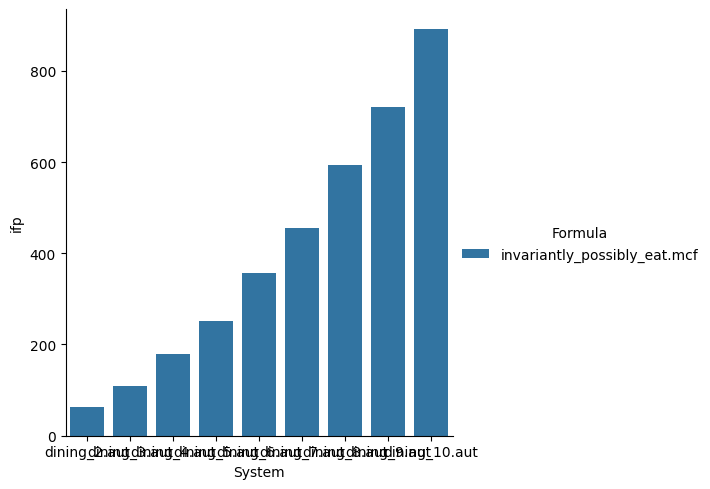

In [8]:
sns.catplot(data=df[df["Algorithm"] == "EMERSON_LEI"][df["Formula"] == "invariantly_possibly_eat.mcf"], kind="bar",
            x="System", y="ifp", hue="Formula")